In [6]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from fxdayu_alphaman.factor.factor import Factor

class Factor_Volume001(Factor):

    c = 6

    def calculate_volume001(self, data):
        # 逐支股票计算volume003因子
        candle_data = data[1].dropna()
        if len(candle_data) == 0:
            return
        high = candle_data["high"]
        volume = candle_data["volume"]
        adv_s = self.ts_mean(volume, 10)
        factor_volume001 = - self.correlation(high, adv_s, self.c) #计算因子值
        factor_volume001.index = candle_data.index
        factor_volume001 = pd.DataFrame(factor_volume001)
        factor_volume001.columns = [data[0],]
        return  factor_volume001

    def factor_calculator(self, pn_data):
        # volume001
        factor_volume001 = map(self.calculate_volume001, pn_data.iteritems())
        factor_volume001 = pd.concat(factor_volume001, axis=1)
        factor_volume001 = self.winsorize(factor_volume001) #去极值
        factor_volume001 = self.standardize(factor_volume001) #标准化
#         factor_volume001 = self.neutralize(factor_volume001, factorIsMV=False) #行业、市值中性化
        factor_volume001 = self.factor_df_to_factor_mi(factor_volume001) #格式标准化
#         factor_volume001 = self.get_factor_by_rankScore(factor_volume001, ascending=True) # 将因子用排序分值重构，并处理到0-1之间(默认为升序——因子越大 排序分值越大(越好)
                                                                                          # 具体根据因子对收益的相关关系而定，为正则应用升序,为负用降序)
        return factor_volume001

In [7]:
from datetime import datetime
from fxdayu_data import DataAPI
from fxdayu_alphaman.factor.utility import standard_code_style
from fxdayu_alphaman.factor.admin import Admin
import tushare as ts

# 测试参数设置
start = datetime(2013, 1, 1)
end = datetime(2017, 4, 18, 15)
periods = (1, 5, 10)

# 获取数据
PN = DataAPI.candle("HS300", "D", ('high','close', 'volume'), start=start, end=end)
prices = PN.minor_xs('close')
print PN
print prices

<class 'pandas.core.panel.Panel'>
Dimensions: 300 (items) x 1040 (major_axis) x 3 (minor_axis)
Items axis: 000001.XSHE to 603993.XSHG
Major_axis axis: 2013-01-04 15:00:00 to 2017-04-18 15:00:00
Minor_axis axis: close to volume
                     000001.XSHE  000002.XSHE  000008.XSHE  000009.XSHE  \
2013-01-04 15:00:00      15.9900          NaN      10.6100       8.7500   
2013-01-07 15:00:00      16.3000          NaN      10.6800       8.8400   
2013-01-08 15:00:00      16.0000          NaN      10.8500       8.8000   
2013-01-09 15:00:00      15.8600          NaN      11.0100       8.9500   
2013-01-10 15:00:00      15.8700          NaN      11.0800       8.9500   
2013-01-11 15:00:00      15.5400          NaN      10.8600       8.6300   
2013-01-14 15:00:00      17.0900          NaN      11.0500       8.8800   
2013-01-15 15:00:00      17.6100          NaN      11.0500       9.1800   
2013-01-16 15:00:00      17.8200          NaN      10.9200       9.1800   
2013-01-17 15:00:00    

In [8]:
def unit_test1(data):
    volume001 = Factor_Volume001()
    factor = volume001.factor(data)
    return factor

factor = unit_test1(PN)
print factor

                                   factor
date                asset                
2013-01-24 15:00:00 000001.XSHE -0.960406
                    000008.XSHE -1.051098
                    000009.XSHE  0.166441
                    000027.XSHE -0.036672
                    000039.XSHE -0.405170
                    000060.XSHE -0.686649
                    000063.XSHE  1.370842
                    000069.XSHE  0.571736
                    000100.XSHE  0.684527
                    000156.XSHE  0.962293
                    000338.XSHE -0.540725
                    000402.XSHE  1.183903
                    000413.XSHE -0.964678
                    000415.XSHE -1.097505
                    000423.XSHE -0.068977
                    000425.XSHE -0.990873
                    000503.XSHE -1.125759
                    000538.XSHE  1.291162
                    000540.XSHE  0.391754
                    000555.XSHE -0.935607
                    000559.XSHE -1.079103
                    000568.XSHE  2

/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


因子的IC值：
                           1         5         10
date                                             
2013-01-24 15:00:00 -0.034287 -0.126601 -0.110347
2013-01-25 15:00:00 -0.064022 -0.046022 -0.007322
2013-01-28 15:00:00 -0.057615 -0.059077 -0.066833
2013-01-29 15:00:00 -0.049940 -0.062336  0.009850
2013-01-30 15:00:00 -0.055114 -0.139806  0.151011
2013-01-31 15:00:00 -0.218682 -0.018982  0.250143
2013-02-01 15:00:00 -0.130848  0.119045  0.331548
2013-02-04 15:00:00  0.158224  0.273724  0.297251
2013-02-05 15:00:00  0.031860  0.168472  0.226922
2013-02-06 15:00:00  0.003340  0.151089  0.209303
2013-02-07 15:00:00  0.136215  0.233323  0.217096
2013-02-08 15:00:00  0.100246  0.149271  0.154956
2013-02-18 15:00:00  0.015938  0.062397  0.061011
2013-02-19 15:00:00  0.069810  0.079238 -0.010491
2013-02-20 15:00:00  0.071680  0.076202 -0.004645
2013-02-21 15:00:00 -0.080623 -0.017499 -0.070505
2013-02-22 15:00:00 -0.001627  0.017986  0.043199
2013-02-25 15:00:00  0.108357  0.041191  0

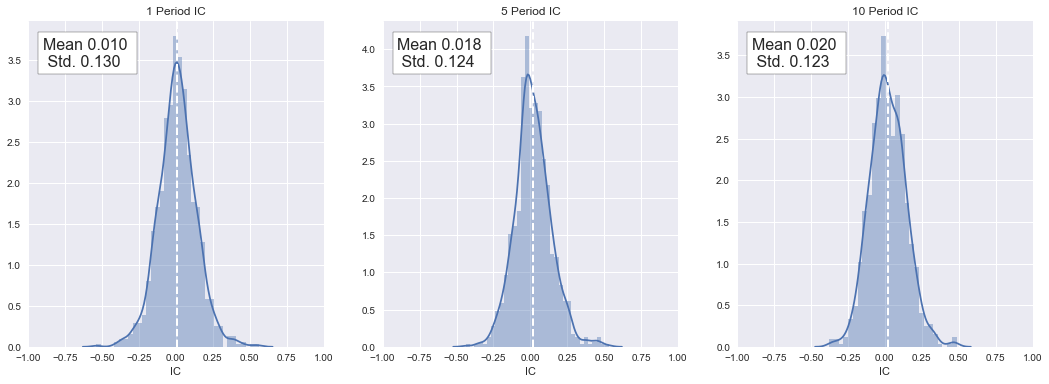

/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/alphalens/plotting.py:215: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=22,center=False).mean()
  pd.rolling_mean(ic, 22).plot(ax=a,


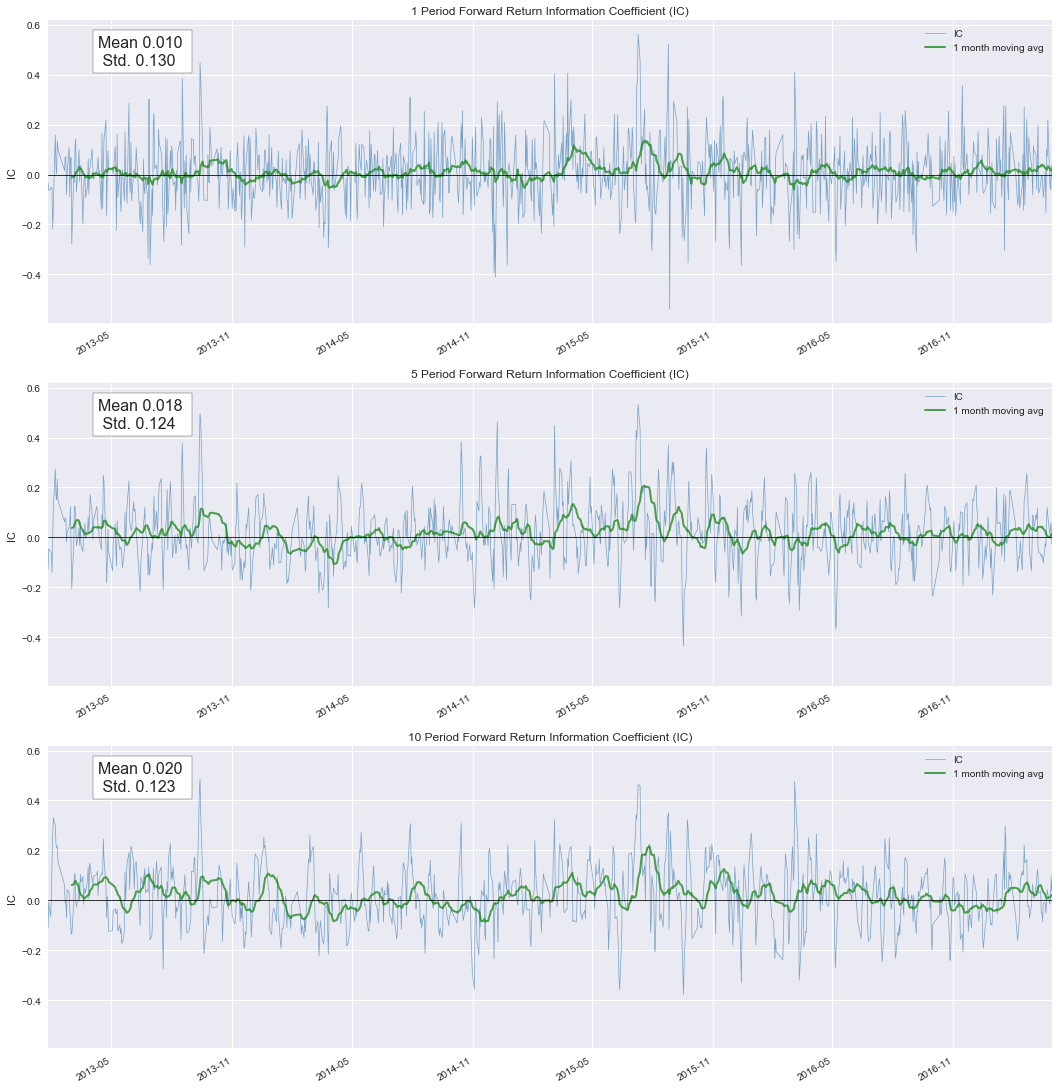

平均IC值-月：


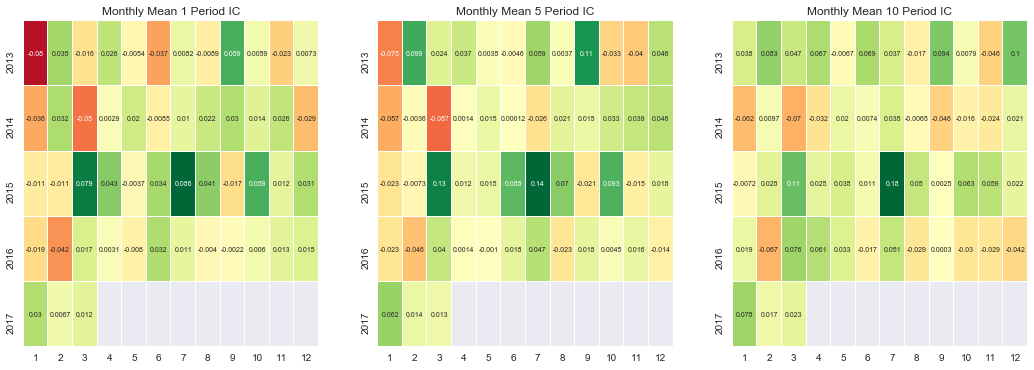

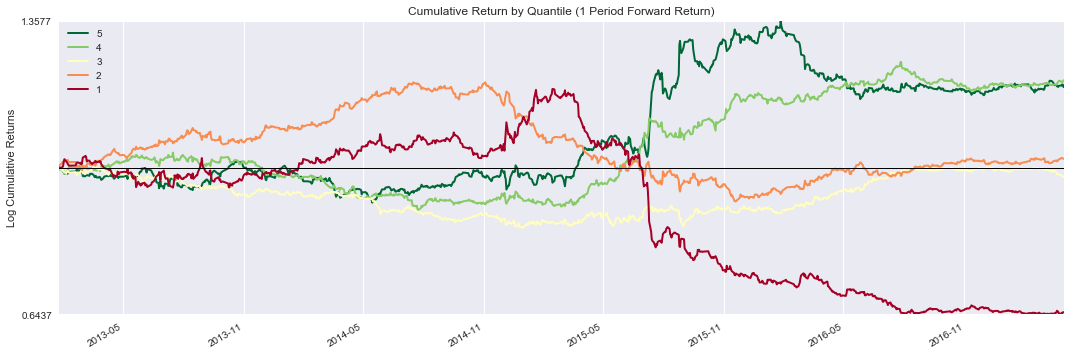

/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))


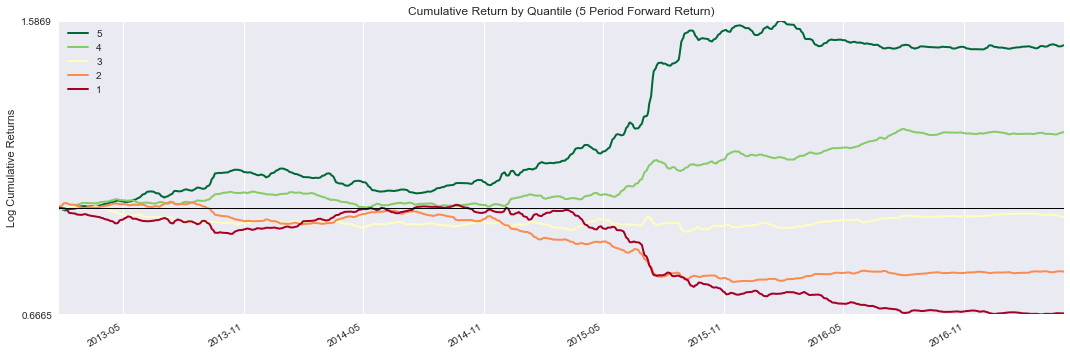

/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))


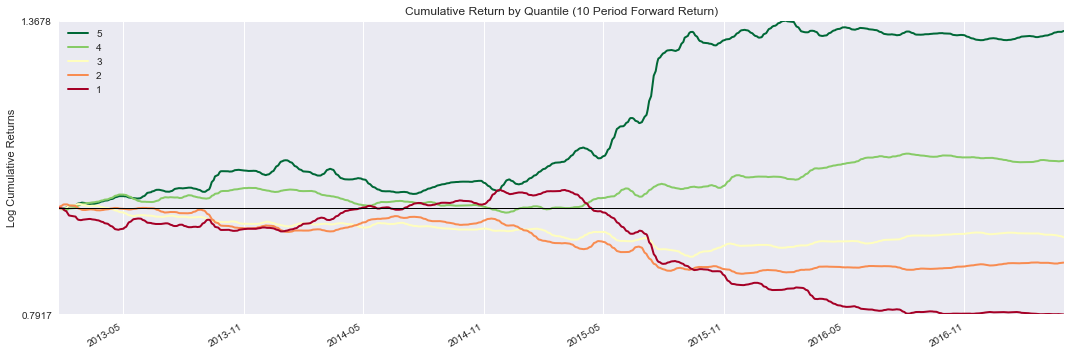

In [9]:
def test_performance(factor, prices):
    import matplotlib.pyplot as plt
    from alphalens import utils,performance,plotting

    # 持股收益-逐只
    stocks_holding_return = utils.get_clean_factor_and_forward_returns(factor,prices,quantiles=5,periods=(1,5,10))

    print("因子的IC值：")
    ic = performance.factor_information_coefficient(stocks_holding_return)
    print(ic)
    plotting.plot_ic_hist(ic)
    plt.show()
    plotting.plot_ic_ts(ic)
    plt.show()
    
    
    print("平均IC值-月：")
    mean_ic = performance.mean_information_coefficient(stocks_holding_return,by_time="M")
    plotting.plot_monthly_ic_heatmap(mean_ic)
    plt.show()


    # 按quantile区分的持股平均收益（减去了总体平均值）
    mean_return_by_q = performance.mean_return_by_quantile(stocks_holding_return, by_date=True, demeaned=True)[0]
    # 按quantile画出累积持有收益
    for i in [1, 5, 10]:
        plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, period=i)
        plt.show()

# print factor
test_performance(factor,prices)

In [10]:
## 读取IC历史绩效
admin = Admin()
original_perf = admin.calculate_performance('cool',factor,start,end,periods=(1,5,10),quantiles=5,price=prices)
print(original_perf.mean_ic)

                                        1         5        10    factor  \
date                asset                                                 
2013-01-24 15:00:00 000001.XSHE -0.015424  0.084833  0.071979 -0.960406   
                    000008.XSHE  0.018103  0.061207  0.060345 -1.051098   
                    000009.XSHE -0.019629  0.058888  0.038168  0.166441   
                    000027.XSHE  0.000000  0.031987  0.045455 -0.036672   
                    000039.XSHE -0.020379 -0.010541 -0.022488 -0.405170   
                    000060.XSHE  0.017978  0.151685  0.268528 -0.686649   
                    000063.XSHE  0.000000  0.064516 -0.006843  1.370842   
                    000069.XSHE -0.036075 -0.034632 -0.005772  0.571736   
                    000100.XSHE  0.004167 -0.004167  0.000000  0.684527   
                    000156.XSHE  0.100184 -0.013522 -0.071297  0.962293   
                    000338.XSHE -0.023266  0.036802  0.145516 -0.540725   
                    00040

AttributeError: 'Series' object has no attribute 'columns'

In [11]:
# 参数优化

volume = Factor_Volume001()
para_range_dict = {"c":range(4,9,1)}
factor_value_list,para_dict_list = admin.enumerate_parameter('cool',para_range_dict,DataAPI.candle.find("HS300"),start,end, Factor=volume)

factor_name_list = []
for para_dict in para_dict_list:
    factor_name_list.append("Factor_Volume001+" + str(para_dict))

performance_list = admin.show_factors_performance(factor_name_list,factor_value_list,start,end,periods=(1,5,10),quantiles=5,price=prices)

print("#####################################################################################")
# 按绩效指标对结果排序（寻优） 本例按10天持有期的mean_IC降序排列了所有结果。
performance_list = admin.rank_performance(performance_list,
                                          target_period=10,
                                          ascending=False)

print performance_list[0].mean_ic
print performance_list[0].factor_name

# for perf in performance_list:
#     print("\n")
#     print(perf.mean_ic)
#     print(perf.factor_name)

                                        1         5        10    factor  \
date                asset                                                 
2013-01-04 15:00:00 000001.XSHE  0.019387 -0.028143  0.146335  1.419378   
                    000008.XSHE  0.006598  0.023563  0.078228 -0.703611   
                    000009.XSHE  0.010286 -0.013714  0.058286 -0.903765   
                    000027.XSHE  0.001647 -0.026622  0.014975  1.532833   
                    000039.XSHE  0.030453  0.046091  0.066667 -0.678114   
                    000060.XSHE -0.010799 -0.021598 -0.017279 -1.269333   
                    000063.XSHE -0.022634  0.017490  0.046296 -1.176864   
                    000069.XSHE -0.022457 -0.064729 -0.036988 -0.575932   
                    000100.XSHE  0.018100  0.013575  0.122172 -0.976501   
                    000156.XSHE  0.100253  0.264167  0.185702 -1.269333   
                    000157.XSHE -0.001087 -0.060870 -0.015217 -1.092085   
                    00033

AttributeError: 'Series' object has no attribute 'columns'

In [12]:
import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor, prices, quantiles=5)

factor_data[factor_data.factor_quantile==5].factor_quantile.unstack().replace(5, 1).fillna(0).to_excel('opt_Selection.xlsx')


In [17]:
factor_data.head()

1         5        10    factor  \
date                asset                                                 
2013-01-24 15:00:00 000001.XSHE -0.015424  0.084833  0.071979 -0.960406   
                    000008.XSHE  0.018103  0.061207  0.060345 -1.051098   
                    000009.XSHE -0.019629  0.058888  0.038168  0.166441   
                    000027.XSHE  0.000000  0.031987  0.045455 -0.036672   
                    000039.XSHE -0.020379 -0.010541 -0.022488 -0.405170   

                                 factor_quantile  
date                asset                         
2013-01-24 15:00:00 000001.XSHE                1  
                    000008.XSHE                1  
                    000009.XSHE                4  
                    000027.XSHE                4  
                    000039.XSHE                3

In [19]:
from IPython.display import display

display(factor_data[factor_data.factor_quantile==5].factor_quantile.unstack().replace(5, 1).fillna(0)
        .to_excel('opt_Selection.xlsx'))

asset,000001.XSHE,000002.XSHE,000008.XSHE,000009.XSHE,000027.XSHE,000039.XSHE,000060.XSHE,000061.XSHE,000063.XSHE,000069.XSHE,...,601933.XSHG,601939.XSHG,601958.XSHG,601985.XSHG,601988.XSHG,601989.XSHG,601998.XSHG,603000.XSHG,603885.XSHG,603993.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2013-01-24 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2013-01-25 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2013-01-28 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-01-29 15:00:00,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2013-01-30 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-31 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2013-02-01 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2013-02-04 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2013-02-05 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 作业
将因子做参数优化，最后输出最优股票池excel。